In [1]:
import torch
import torch.optim as optim
from torchvision import datasets
from torchsummary import summary
from model import Net
from utils import data_transformation,get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class

In [2]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:utils:device: cuda


Available Device ::  cuda


In [3]:
transformation_matrix = {
                         "mean_of_data":(0.1307,),
                         "std_of_data": (0.3081,)
                         }

dataloader_kwargs = {'batch_size': 64, 'shuffle': True, 'num_workers': 1, 'pin_memory': True}


train_transforms, test_transforms = data_transformation(transformation_matrix)
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, **dataloader_kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_kwargs)

INFO:utils:transformation Details ::: 


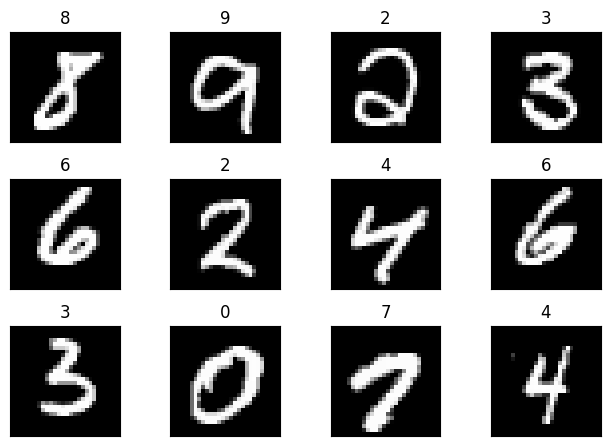

In [4]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
              ReLU-2            [-1, 4, 26, 26]               0
       BatchNorm2d-3            [-1, 4, 26, 26]               8
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             360
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]              80
             ReLU-11            [-1, 8, 12, 12]               0
      BatchNorm2d-12            [-1, 8, 12, 12]              16
          Dropout-13            [-1, 8, 12, 12]               0
           Conv2d-14            [-1, 4,

In [6]:
training_parameters = {"learning_rate":0.017,
                       "momentum":0.9,
                       "step_size":6,
                       "gamma":0.3,
                       "max_lr":0.017,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1


Train: Loss=0.0563 Batch_id=937 Accuracy=94.63: 100%|██████████| 938/938 [00:24<00:00, 38.04it/s]


Test set: Average loss: 0.0506, Accuracy: 9837/10000 (98.37%)

Epoch 2


Train: Loss=0.0161 Batch_id=937 Accuracy=98.11: 100%|██████████| 938/938 [00:22<00:00, 41.07it/s]


Test set: Average loss: 0.0383, Accuracy: 9891/10000 (98.91%)

Epoch 3


Train: Loss=0.0476 Batch_id=937 Accuracy=98.49: 100%|██████████| 938/938 [00:22<00:00, 40.79it/s]


Test set: Average loss: 0.0356, Accuracy: 9886/10000 (98.86%)

Epoch 4


Train: Loss=0.0689 Batch_id=937 Accuracy=98.68: 100%|██████████| 938/938 [00:23<00:00, 39.65it/s]


Test set: Average loss: 0.0302, Accuracy: 9905/10000 (99.05%)

Epoch 5


Train: Loss=0.0072 Batch_id=937 Accuracy=98.84: 100%|██████████| 938/938 [00:23<00:00, 40.66it/s]


Test set: Average loss: 0.0270, Accuracy: 9913/10000 (99.13%)

Epoch 6


Train: Loss=0.0488 Batch_id=937 Accuracy=98.93: 100%|██████████| 938/938 [00:23<00:00, 40.74it/s]


Test set: Average loss: 0.0254, Accuracy: 9925/10000 (99.25%)

Epoch 7


Train: Loss=0.1040 Batch_id=937 Accuracy=98.99: 100%|██████████| 938/938 [00:23<00:00, 40.50it/s]


Test set: Average loss: 0.0229, Accuracy: 9927/10000 (99.27%)

Epoch 8


Train: Loss=0.0512 Batch_id=937 Accuracy=98.99: 100%|██████████| 938/938 [00:23<00:00, 40.72it/s]


Test set: Average loss: 0.0235, Accuracy: 9926/10000 (99.26%)

Epoch 9


Train: Loss=0.0530 Batch_id=937 Accuracy=99.04: 100%|██████████| 938/938 [00:22<00:00, 41.14it/s]


Test set: Average loss: 0.0233, Accuracy: 9926/10000 (99.26%)

Epoch 10


Train: Loss=0.0013 Batch_id=937 Accuracy=99.11: 100%|██████████| 938/938 [00:22<00:00, 41.31it/s]


Test set: Average loss: 0.0225, Accuracy: 9927/10000 (99.27%)

Epoch 11


Train: Loss=0.0083 Batch_id=937 Accuracy=99.14: 100%|██████████| 938/938 [00:23<00:00, 40.58it/s]


Test set: Average loss: 0.0225, Accuracy: 9930/10000 (99.30%)

Epoch 12


Train: Loss=0.0019 Batch_id=937 Accuracy=99.14: 100%|██████████| 938/938 [00:23<00:00, 40.76it/s]


Test set: Average loss: 0.0249, Accuracy: 9927/10000 (99.27%)

Epoch 13


Train: Loss=0.0046 Batch_id=937 Accuracy=99.18: 100%|██████████| 938/938 [00:23<00:00, 40.09it/s]


Test set: Average loss: 0.0221, Accuracy: 9919/10000 (99.19%)

Epoch 14


Train: Loss=0.3716 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:22<00:00, 40.91it/s]


Test set: Average loss: 0.0187, Accuracy: 9939/10000 (99.39%)

Epoch 15


Train: Loss=0.0102 Batch_id=937 Accuracy=99.20: 100%|██████████| 938/938 [00:22<00:00, 40.96it/s]


Test set: Average loss: 0.0220, Accuracy: 9930/10000 (99.30%)

Epoch 16


Train: Loss=0.0132 Batch_id=937 Accuracy=99.20: 100%|██████████| 938/938 [00:22<00:00, 41.07it/s]


Test set: Average loss: 0.0200, Accuracy: 9939/10000 (99.39%)

Epoch 17


Train: Loss=0.0372 Batch_id=937 Accuracy=99.25: 100%|██████████| 938/938 [00:22<00:00, 41.09it/s]


Test set: Average loss: 0.0189, Accuracy: 9938/10000 (99.38%)

Epoch 18


Train: Loss=0.0088 Batch_id=937 Accuracy=99.30: 100%|██████████| 938/938 [00:22<00:00, 41.21it/s]


Test set: Average loss: 0.0205, Accuracy: 9942/10000 (99.42%)

Epoch 19


Train: Loss=0.0032 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [00:23<00:00, 40.16it/s]


Test set: Average loss: 0.0190, Accuracy: 9942/10000 (99.42%)

Epoch 20


Train: Loss=0.0578 Batch_id=937 Accuracy=99.32: 100%|██████████| 938/938 [00:23<00:00, 39.66it/s]


Test set: Average loss: 0.0216, Accuracy: 9929/10000 (99.29%)



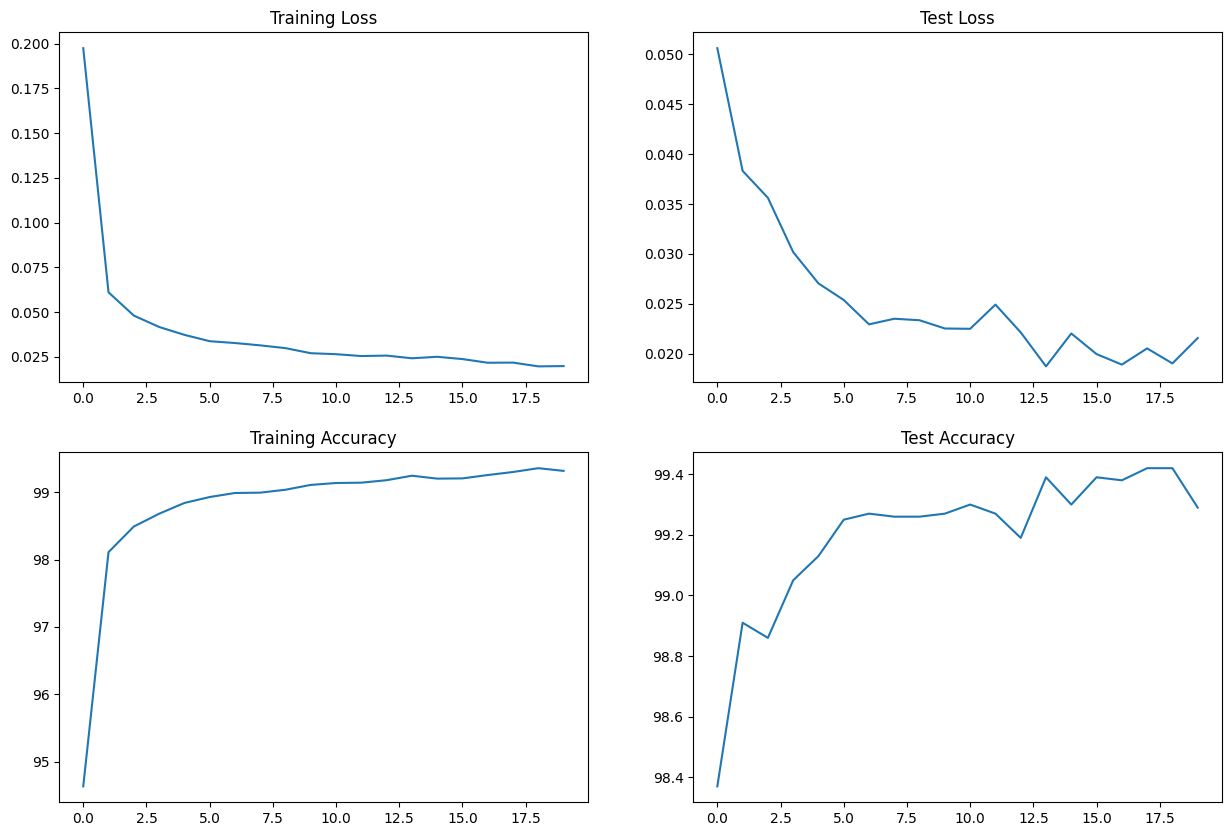

In [7]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

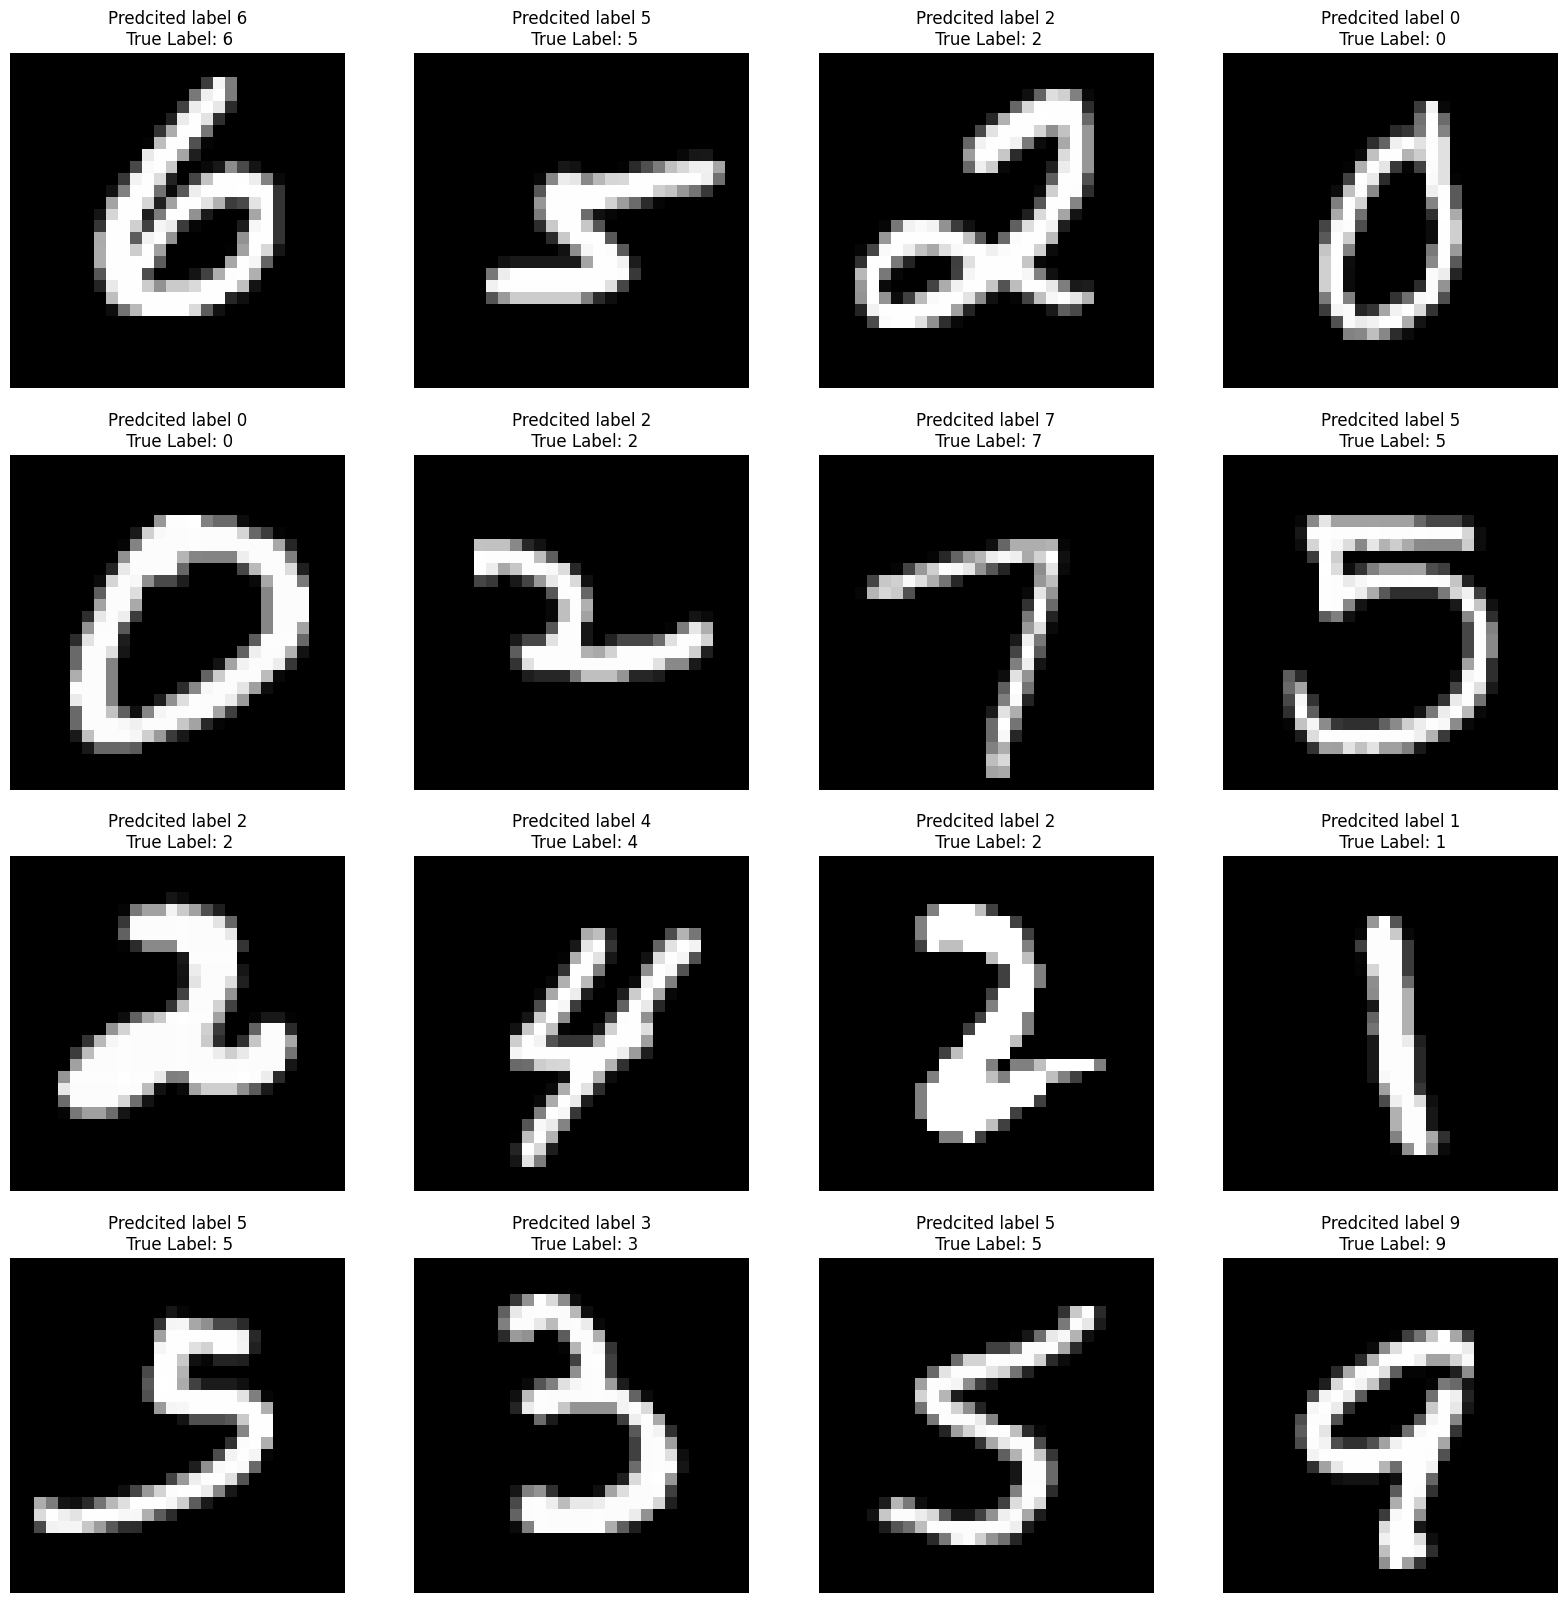

In [8]:
grid_size = (4,4)
show_random_results(test_loader,grid_size,model,device)

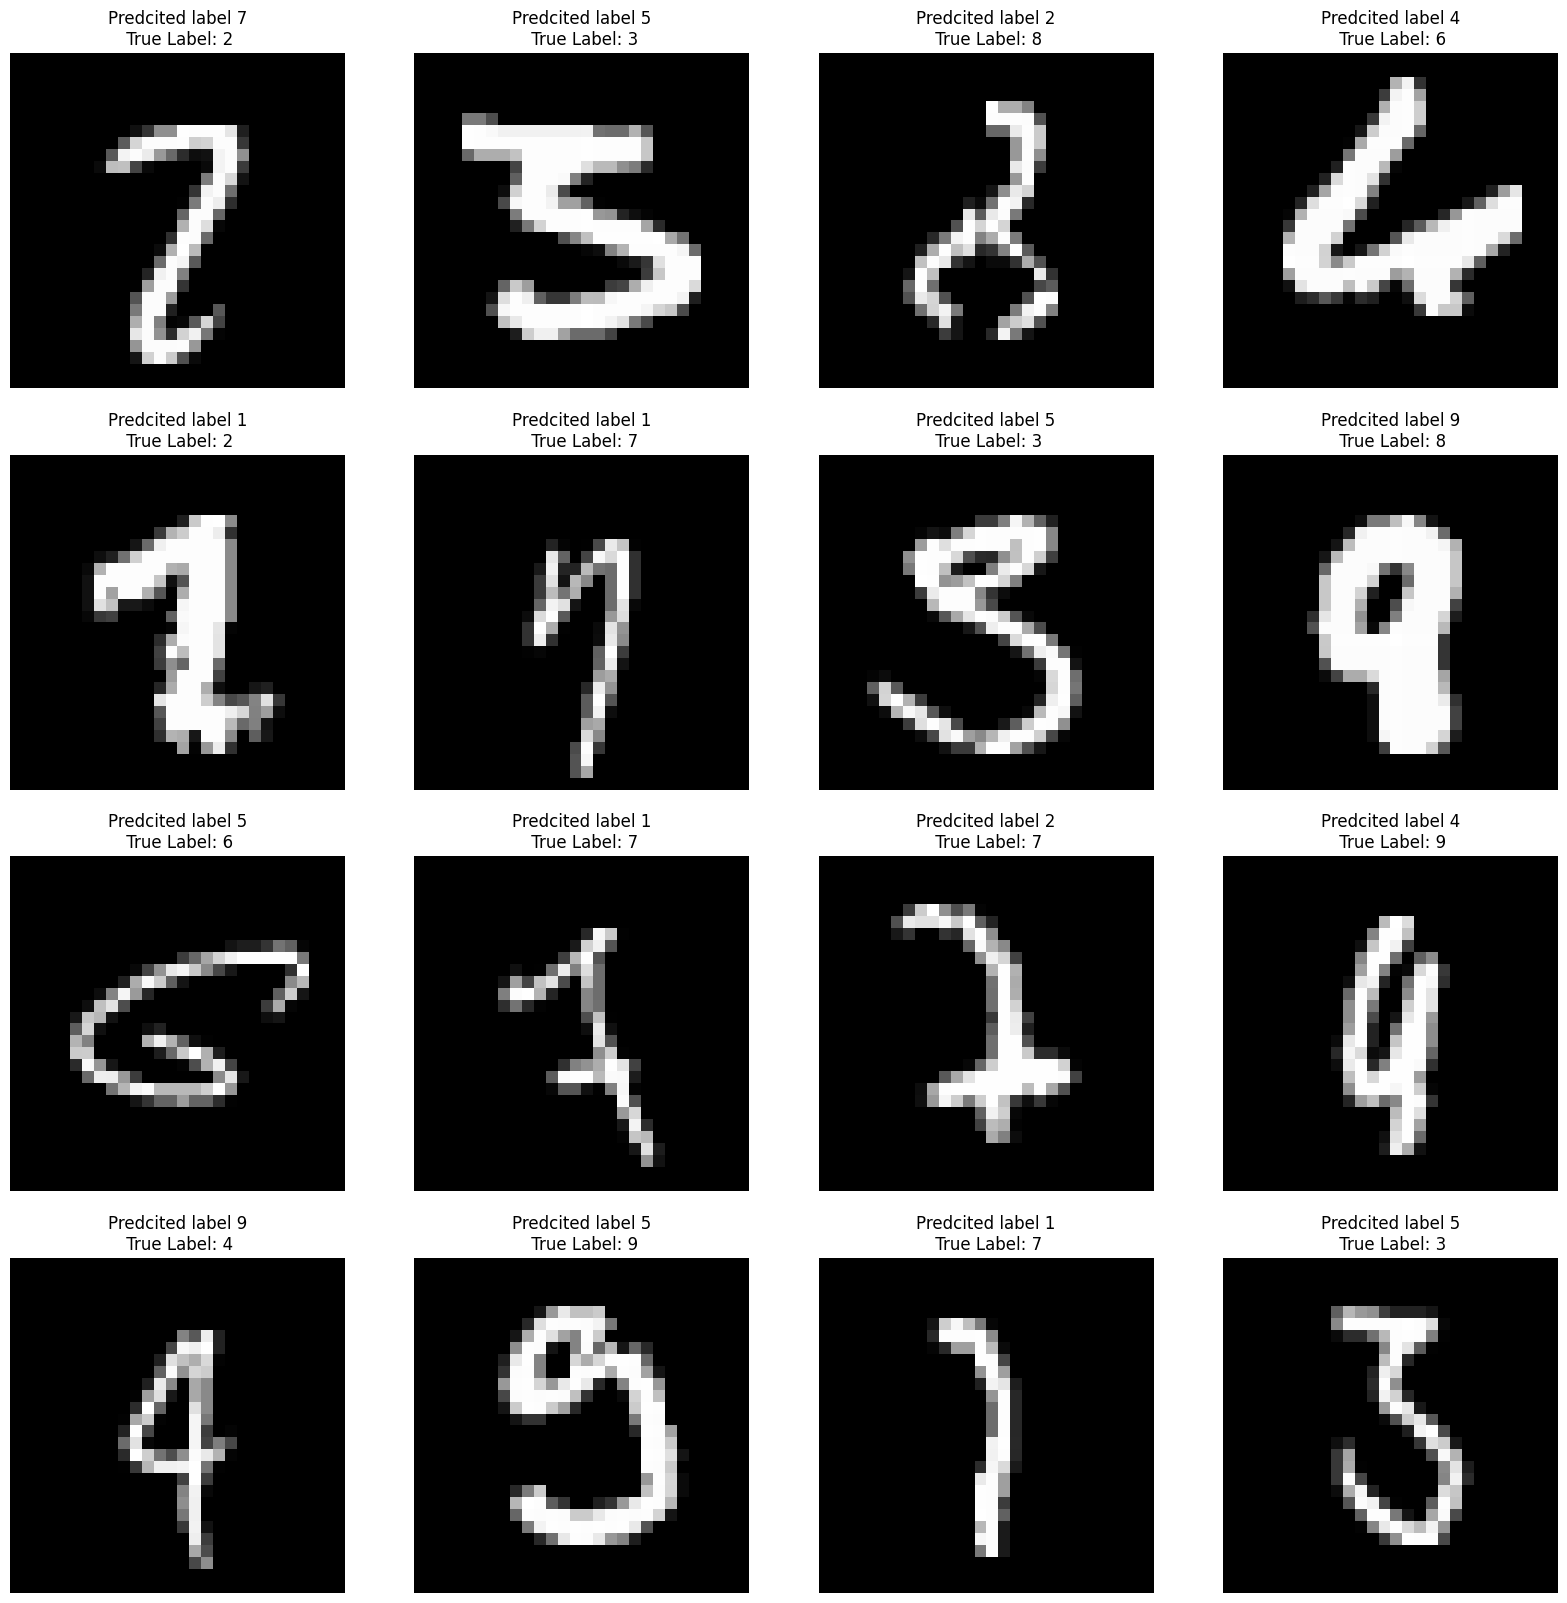

In [9]:
grid_size = (4,4)
plot_misclassified(model,grid_size,test_loader,device)

Accuracy of 0 - zero : 100 %
Accuracy of 1 - one : 100 %
Accuracy of 2 - two : 99 %
Accuracy of 3 - three : 98 %
Accuracy of 4 - four : 100 %
Accuracy of 5 - five : 100 %
Accuracy of 6 - six : 99 %
Accuracy of 7 - seven : 97 %
Accuracy of 8 - eight : 99 %
Accuracy of 9 - nine : 99 %


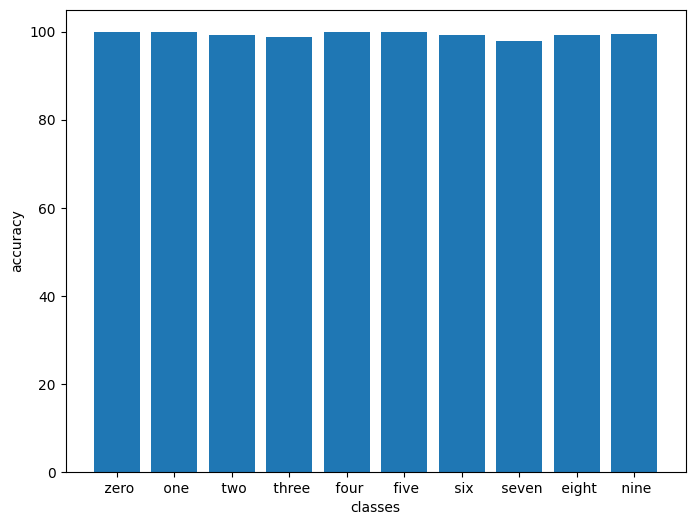

In [10]:
calculate_accuracy_per_class(model,device,test_loader,test_data)